ASSIGNEMENT 7

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

VISULALISATION OF THE ENVIRONEMENTAL DATA

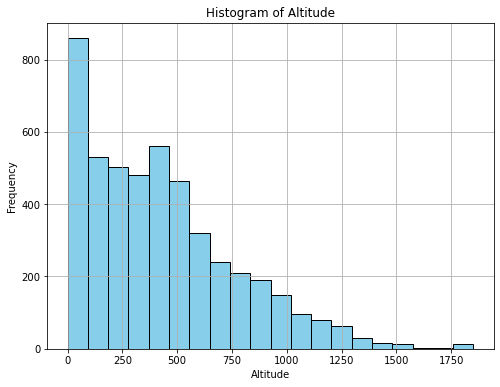

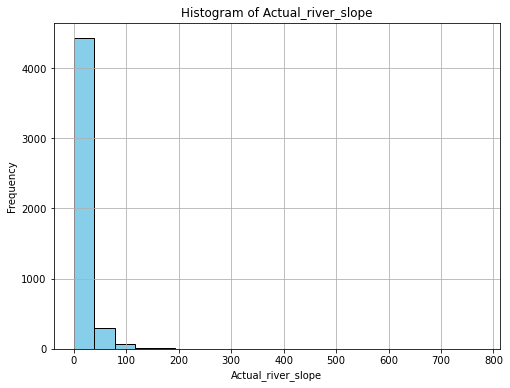

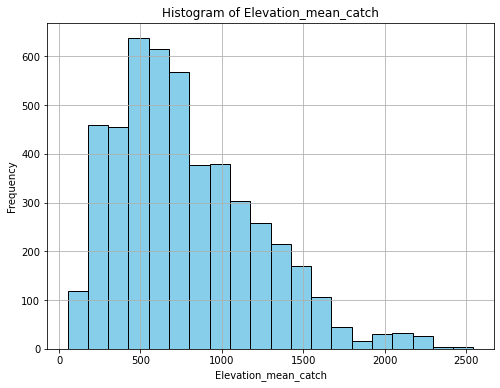

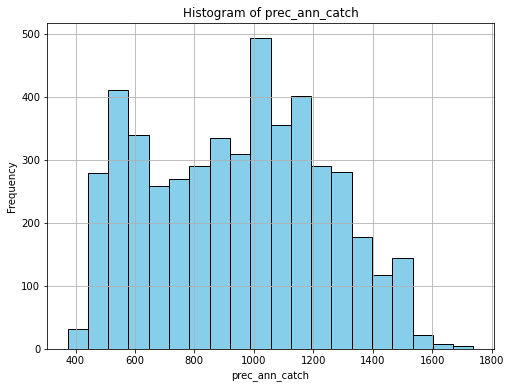

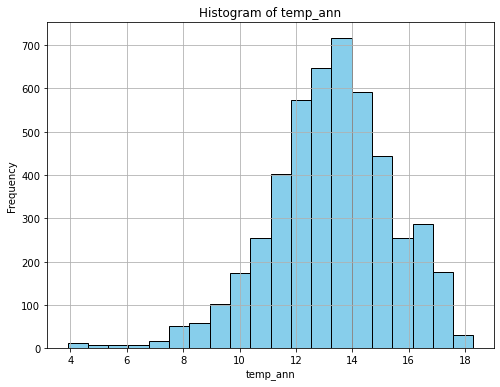

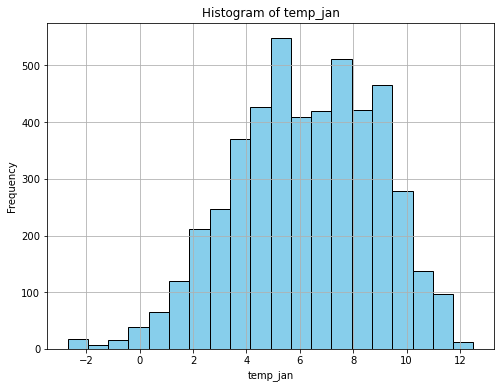

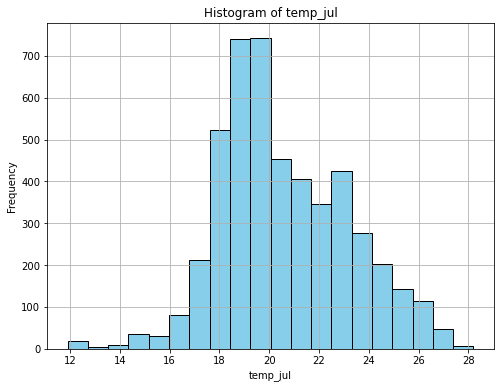

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_EFI = pd.read_csv('EFIplus_medit.csv', delimiter=";")


# Select the continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Remove rows with NaN values only in the specified columns
df_EFI.dropna(subset=continuous_vars, inplace=True)


# Create histograms
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(df_EFI[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


We can see in the histograms that the environmental data do not follow a normal distribution. We can confirm this by conducting a Shapiro test.

In [78]:
# Perform Shapiro-Wilk test for normality on each variable
for var in continuous_vars:
    stat, p = shapiro(df_EFI[var])
    print("Variable:", var)
    print("Shapiro-Wilk Test Statistic:", stat)
    print("p-value:", p)
    if p > 0.05:
        print("The variable {} follows a normal distribution (fail to reject H0)".format(var))
    else:
        print("The variable {} does not follow a normal distribution (reject H0)".format(var))
    print()

Variable: Altitude
Shapiro-Wilk Test Statistic: 0.9255350232124329
p-value: 9.248569864543793e-44
The variable Altitude does not follow a normal distribution (reject H0)

Variable: Actual_river_slope
Shapiro-Wilk Test Statistic: 0.5133316516876221
p-value: 0.0
The variable Actual_river_slope does not follow a normal distribution (reject H0)

Variable: Elevation_mean_catch
Shapiro-Wilk Test Statistic: 0.9491013884544373
p-value: 5.878415108237621e-38
The variable Elevation_mean_catch does not follow a normal distribution (reject H0)

Variable: prec_ann_catch
Shapiro-Wilk Test Statistic: 0.9702954888343811
p-value: 1.7722262527347323e-30
The variable prec_ann_catch does not follow a normal distribution (reject H0)

Variable: temp_ann
Shapiro-Wilk Test Statistic: 0.9829322695732117
p-value: 1.1160483809539355e-23
The variable temp_ann does not follow a normal distribution (reject H0)

Variable: temp_jan
Shapiro-Wilk Test Statistic: 0.9891096949577332
p-value: 7.849606937028617e-19
The var

So, none of the data follows a normal distribution.

Now, let's transform the data using StandardScaler.


In [86]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

df_EFI_normalized = df_EFI.copy()
# Apply Yeo-Johnson transformation to each variable

pt = PowerTransformer(method='yeo-johnson')
df_EFI_normalized[continuous_vars] = pt.fit_transform(df_EFI[continuous_vars])



Now let's create boxplots and histograms to see if the distribution is closer to a normal distribution.

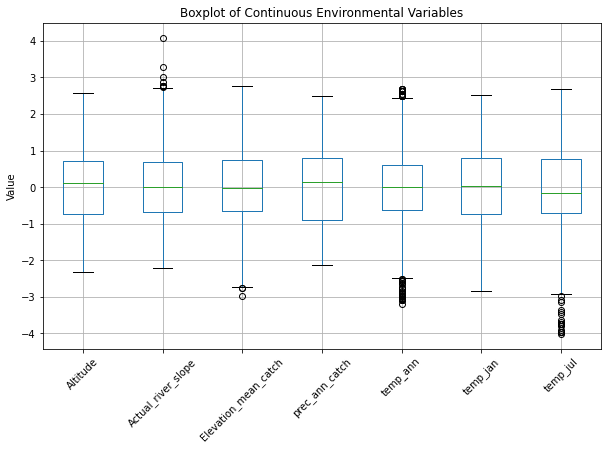

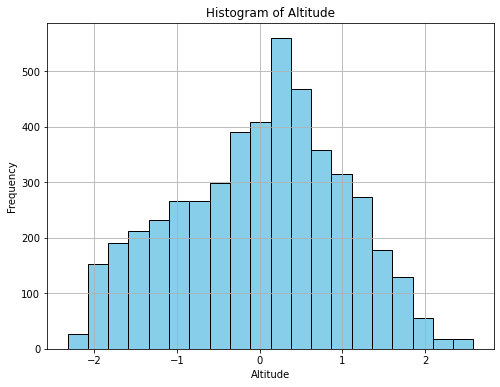

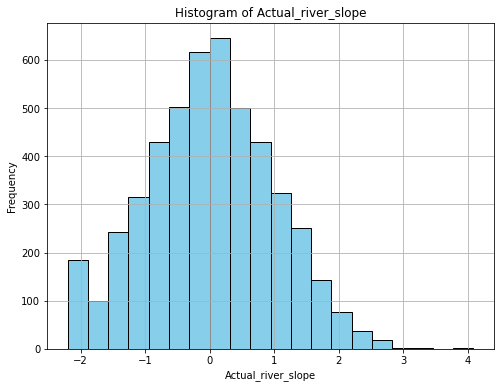

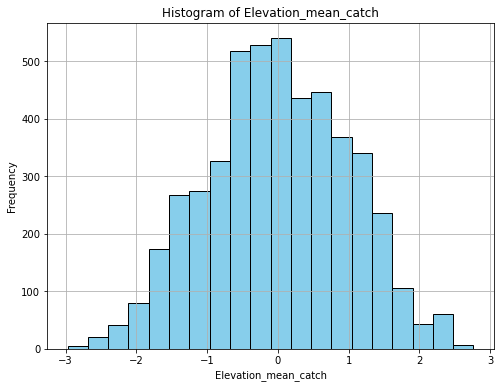

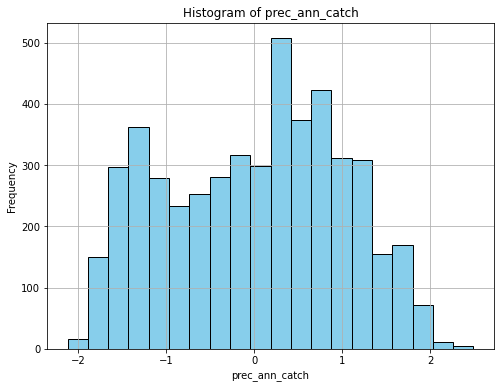

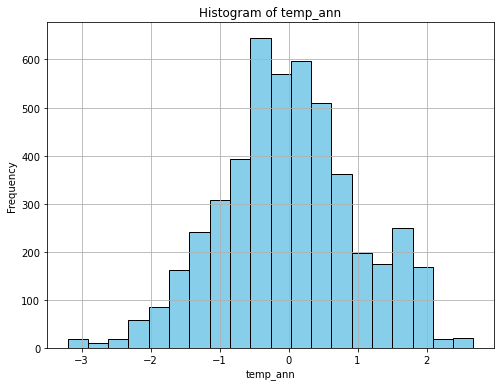

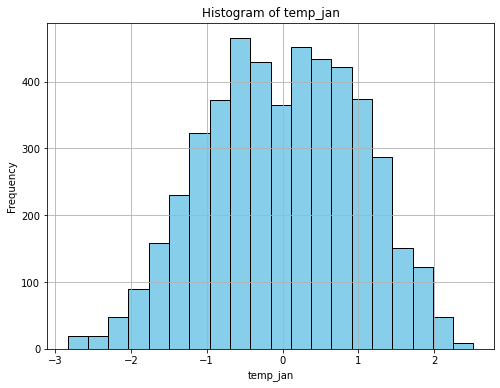

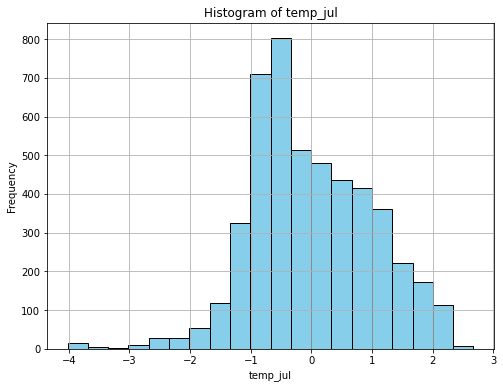

In [87]:
import matplotlib.pyplot as plt

# Plot boxplots for each continuous environmental variable
plt.figure(figsize=(10, 6))
df_EFI_normalized[continuous_variables].boxplot()
plt.title('Boxplot of Continuous Environmental Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Select the continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Create histograms
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(df_EFI_normalized[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Now the distribution of the data appears to be closer to Gaussian. We are going to perform a Shapiro test

In [88]:
# Perform Shapiro-Wilk test for normality on each variable
for var in continuous_vars:
    stat, p = shapiro(df_EFI_normalized[var])
    print("Variable:", var)
    print("Shapiro-Wilk Test Statistic:", stat)
    print("p-value:", p)
    if p > 0.05:
        print("The variable {} follows a normal distribution (fail to reject H0)".format(var))
    else:
        print("The variable {} does not follow a normal distribution (reject H0)".format(var))
    print()

Variable: Altitude
Shapiro-Wilk Test Statistic: 0.9860020875930786
p-value: 1.8204914442390595e-21
The variable Altitude does not follow a normal distribution (reject H0)

Variable: Actual_river_slope
Shapiro-Wilk Test Statistic: 0.995265543460846
p-value: 2.0372000961166314e-11
The variable Actual_river_slope does not follow a normal distribution (reject H0)

Variable: Elevation_mean_catch
Shapiro-Wilk Test Statistic: 0.996150553226471
p-value: 6.84892476066068e-10
The variable Elevation_mean_catch does not follow a normal distribution (reject H0)

Variable: prec_ann_catch
Shapiro-Wilk Test Statistic: 0.9692535996437073
p-value: 6.244305925183847e-31
The variable prec_ann_catch does not follow a normal distribution (reject H0)

Variable: temp_ann
Shapiro-Wilk Test Statistic: 0.9940906763076782
p-value: 3.427472335896381e-13
The variable temp_ann does not follow a normal distribution (reject H0)

Variable: temp_jan
Shapiro-Wilk Test Statistic: 0.9917091727256775
p-value: 3.521649857190

The data still does not follow a normal distribution, but it is the closest I managed to get.

Create a column with the total number of species present (the species richness) in each sampling site
(the first species in the dataset is ‘Abramis brama’ and all the columns to the right are all species).


In [104]:
# Load the dataset
df_EFI = pd.read_csv('EFIplus_medit.csv', delimiter=";")
df_EFI=df_EFI.dropna()

# Select species columns
species_columns = df_EFI.columns[df_EFI.columns.get_loc('Abramis brama'):]

# Calculate species richness for each sampling site
df_EFI['Species Richness'] = df_EFI[species_columns].sum(axis=1)

# Display the first few rows of the DataFrame with species richness
print(df_EFI[['Site_code', 'Species Richness']].head(20))



      Site_code  Species Richness
18   ES_03_0001                 6
19   ES_03_0002                 6
28   ES_03_0012                 7
32   ES_03_0016                 8
43   ES_03_0029                 7
44   ES_03_0030                 7
60   ES_03_0046                 4
66   ES_03_0053                 7
71   ES_03_0058                 5
91   ES_04_0002                 5
92   ES_04_0003                 5
93   ES_04_0004                 8
94   ES_04_0005                 6
101  ES_05_0012                 7
102  ES_05_0013                 2
126  ES_07_0009                 2
127  ES_07_0010                 3
128  ES_07_0011                 3
169  ES_09_0001                 6
179  ES_09_0011                 7


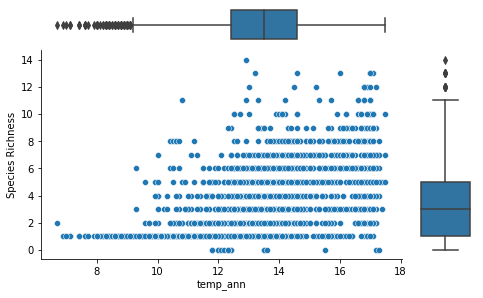

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a JointGrid plot
g = sns.JointGrid(data=df_EFI, x='temp_ann', y='Species Richness')

# Plot scatter plot and box plot for each variable
g.plot(sns.scatterplot, sns.boxplot)

# Remove marginal axes
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()

# Set figure width and height
g.fig.set_figwidth(7)
g.fig.set_figheight(4)

# Show the plot
plt.show()




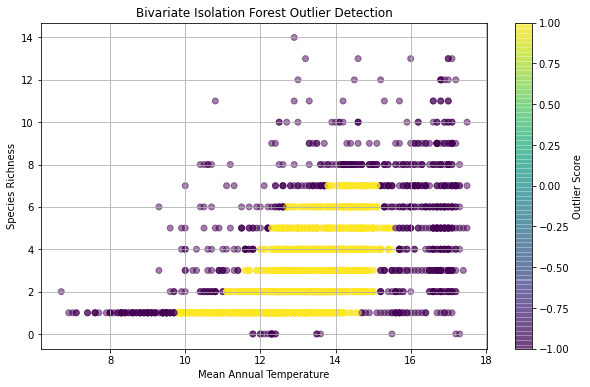

In [106]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create a DataFrame with only 'temp_ann' and 'Species Richness' columns
data = df_EFI[['temp_ann', 'Species Richness']]

# Fit Isolation Forest model
clf = IsolationForest(random_state=42)
clf.fit(data)

# Predict outliers
outliers = clf.predict(data)

# Plot the result
plt.figure(figsize=(10, 6))
plt.scatter(data['temp_ann'], data['Species Richness'], c=outliers, cmap='viridis', alpha=0.5)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Species Richness')
plt.title('Bivariate Isolation Forest Outlier Detection')
plt.colorbar(label='Outlier Score')
plt.grid(True)
plt.show()


Points with colors closer to yellow or green have outlier scores closer to 1 and are considered less abnormal.
Points with colors closer to blue or purple have outlier scores closer to -1 and are considered more abnormal or outliers.